In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16

2023-10-17 17:09:40.951948: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 17:09:40.996657: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 17:09:40.996728: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 17:09:40.996757: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 17:09:41.006463: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 17:09:41.009436: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)
train_images = tf.image.resize(train_images, (32, 32)) / 255.0
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)
test_images = tf.image.resize(test_images, (32, 32)) / 255.0

2023-10-17 17:09:45.838059: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 141120000 exceeds 10% of free system memory.
2023-10-17 17:09:45.975499: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 737280000 exceeds 10% of free system memory.
2023-10-17 17:09:46.603532: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 737280000 exceeds 10% of free system memory.
2023-10-17 17:09:47.111613: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23520000 exceeds 10% of free system memory.
2023-10-17 17:09:47.125518: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 31s 1us/step


In [4]:
model = models.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [7]:
epochs = 10
batch_size = 64
history_additional = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 1968s 2s/step - loss: 0.9581 - accuracy: 0.6148 - val_loss: 0.7227 - val_accuracy: 0.7251
Epoch 2/10
938/938 [==============================] - 1684s 2s/step - loss: 0.5258 - accuracy: 0.8049 - val_loss: 0.4757 - val_accuracy: 0.8248
Epoch 3/10
938/938 [==============================] - 1742s 2s/step - loss: 0.3772 - accuracy: 0.8787 - val_loss: 0.3655 - val_accuracy: 0.8779
Epoch 4/10
938/938 [==============================] - 1673s 2s/step - loss: 0.3375 - accuracy: 0.8908 - val_loss: 0.3388 - val_accuracy: 0.8838
Epoch 5/10
938/938 [==============================] - 60511s 65s/step - loss: 0.2792 - accuracy: 0.9079 - val_loss: 0.2836 - val_accuracy: 0.9042
Epoch 6/10
938/938 [==============================] - 1669s 2s/step - loss: 0.2601 - accuracy: 0.9146 - val_loss: 0.2652 - val_accuracy: 0.9128
Epoch 7/10
938/938 [==============================] - 1557s 2s/step - loss: 0.2690 - accuracy: 0.9127 - val_loss: 0.2679 - val_accurac

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nТочність на тестових даних: {test_acc}")

313/313 - 23s - loss: 0.2945 - accuracy: 0.9130 - 23s/epoch - 75ms/step

Точність на тестових даних: 0.9129999876022339


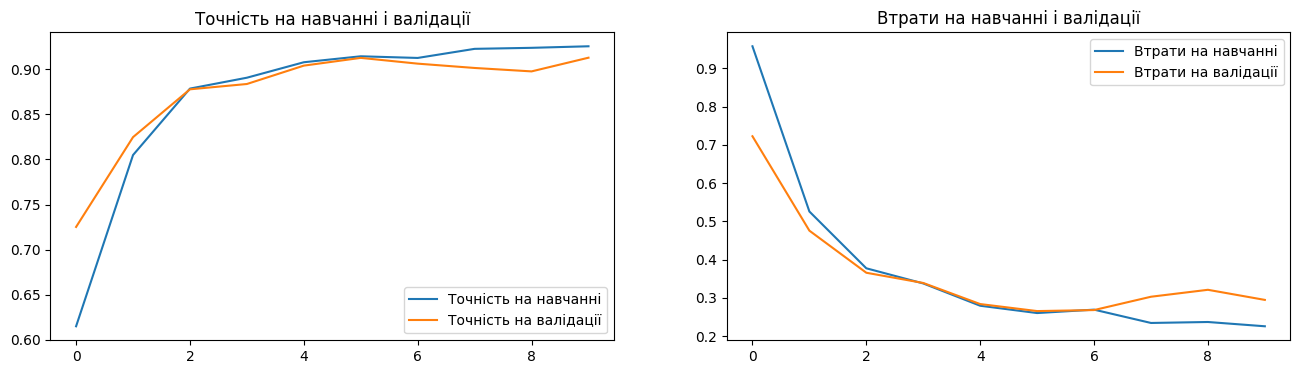

Epoch 10/15
1875/1875 [==============================] - 1817s 968ms/step - loss: 0.1545 - accuracy: 0.9499 - val_loss: 0.2493 - val_accuracy: 0.9246
Epoch 11/15
1875/1875 [==============================] - 1675s 894ms/step - loss: 0.1373 - accuracy: 0.9539 - val_loss: 0.2446 - val_accuracy: 0.9259
Epoch 12/15
1875/1875 [==============================] - 1790s 955ms/step - loss: 0.1286 - accuracy: 0.9576 - val_loss: 0.2460 - val_accuracy: 0.9279
Epoch 13/15
1875/1875 [==============================] - 1827s 975ms/step - loss: 0.1237 - accuracy: 0.9593 - val_loss: 0.2469 - val_accuracy: 0.9281
Epoch 14/15
1875/1875 [==============================] - 1909s 1s/step - loss: 0.1164 - accuracy: 0.9603 - val_loss: 0.2510 - val_accuracy: 0.9291
Epoch 15/15
1875/1875 [==============================] - 1858s 991ms/step - loss: 0.1121 - accuracy: 0.9616 - val_loss: 0.2558 - val_accuracy: 0.9291


In [9]:
acc = history_additional.history['accuracy']
val_acc = history_additional.history['val_accuracy']
loss = history_additional.history['loss']
val_loss = history_additional.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точність на навчанні')
plt.plot(epochs_range, val_acc, label='Точність на валідації')
plt.legend(loc='lower right')
plt.title('Точність на навчанні і валідації')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Втрати на навчанні')
plt.plot(epochs_range, val_loss, label='Втрати на валідації')
plt.legend(loc='upper right')
plt.title('Втрати на навчанні і валідації')

plt.show()

for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 5
total_epochs = epochs + fine_tune_epochs

history_fine_tune = model.fit(train_images, train_labels, epochs=total_epochs, initial_epoch=history_additional.epoch[-1],
                             validation_data=(test_images, test_labels))

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nТочність на тестових даних: {test_acc}")

313/313 - 24s - loss: 0.2558 - accuracy: 0.9291 - 24s/epoch - 76ms/step

Точність на тестових даних: 0.929099977016449


In [11]:
#Висновки:Модель CNN демонструє вищий рівень точності як на тестових, так і на валідаційних даних, порівняно з Fully Connected Neural Network. Це свідчить про те, що використання згорткових нейронних мереж для завдань обробки зображень дозволяє досягнути кращих результатів.
#Fully Connected Neural Network також досягає досить високої точності, але в порівнянні з CNN, вона виявляється менш ефективною у вирішенні завдань класифікації зображень.
#Загалом, для завдань класифікації зображень, особливо на великих наборах даних, CNN є більш підходящим вибором і зазвичай дає кращі результати завдяки своїм спеціалізованим згортковим та пулінговим шарам для виявлення різних ознак в зображеннях.